#**LUNG CANCER PREDICTION**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
from IPython.display import Image, display, HTML
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#TRAIN IMAGES

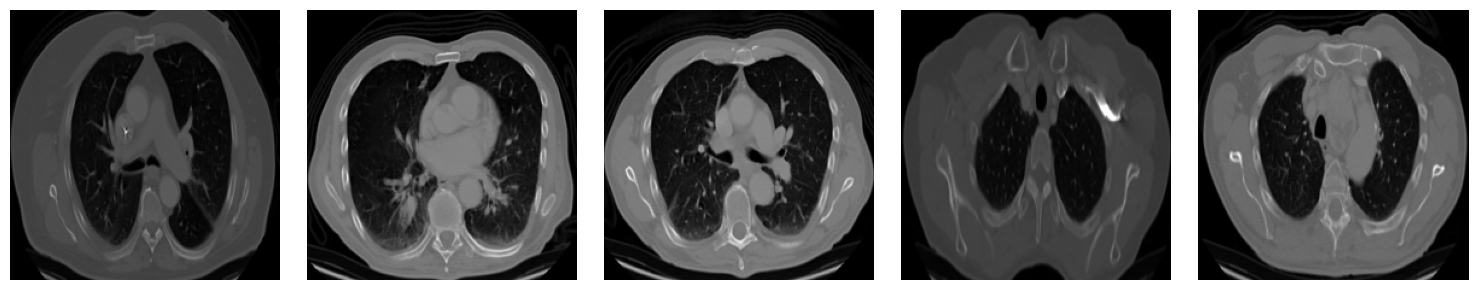

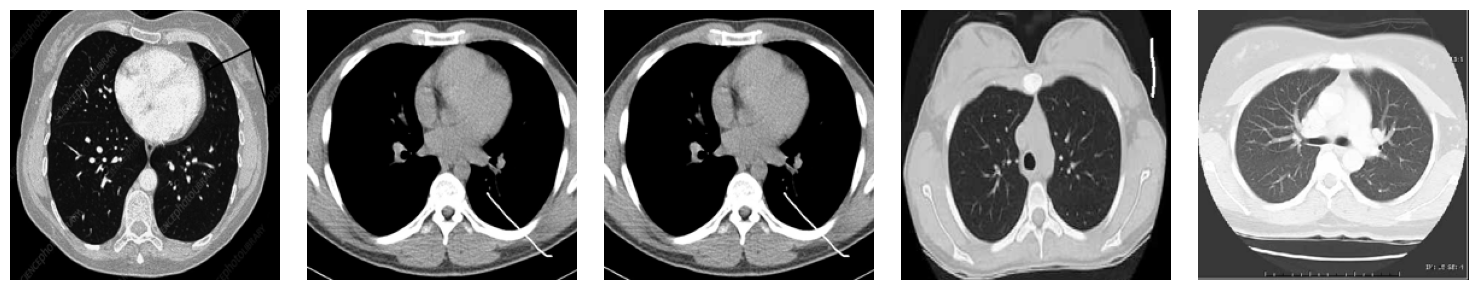

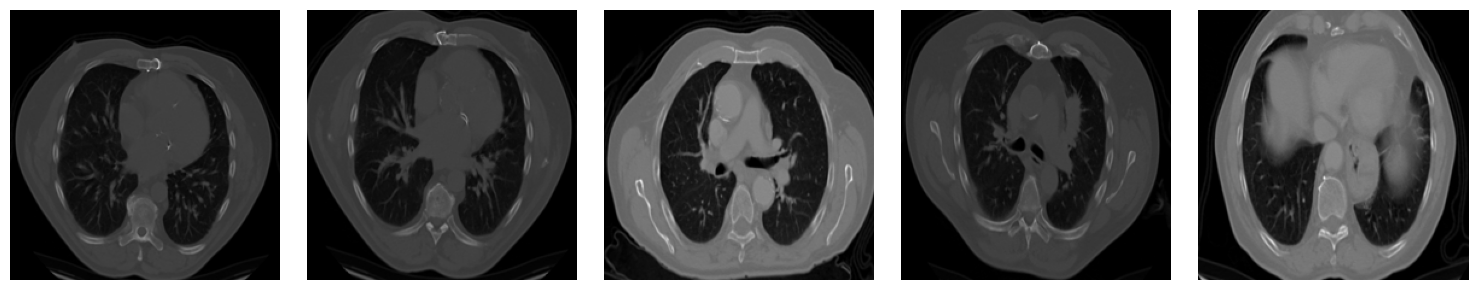

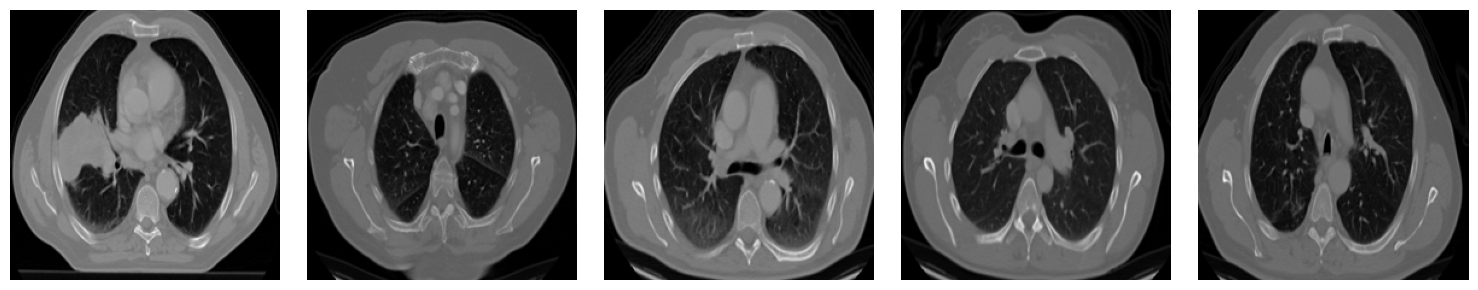

Class: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, Number of Images: 115
Class: normal, Number of Images: 148
Class: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, Number of Images: 165
Class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, Number of Images: 195


In [ ]:
# Paths to the image folders
train_folders = [
    "/content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa",
    "/content/drive/MyDrive/Data/train/normal",
    "/content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa",
    "/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib"
]

# Image size
image_size = (224, 224)

# Create a dictionary to store the class names and their corresponding number of images
class_counts = {}

# Loop through the class folders
for train_folder in train_folders:
    class_name = os.path.basename(train_folder)  # Get the class name from the folder path

    # Get the list of image filenames in the current folder
    image_filenames = os.listdir(train_folder)

    # Count the number of images in the class
    num_images = len(image_filenames)

    # Update the class_counts dictionary
    class_counts[class_name] = num_images

    # Choose the number of images to display from each folder
    num_images_to_display = 5
    random_images = random.sample(image_filenames, num_images_to_display)

    # Create a figure with a single row and the desired number of columns
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

    # Loop through the image filenames and display the images
    for i, image_filename in enumerate(random_images):
        image_path = os.path.join(train_folder, image_filename)
        image = Image.open(image_path)
        image = image.resize(image_size)

        # Display the image in the appropriate subplot
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

# Print the class names and their respective number of images
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of Images: {count}")


In [ ]:
# Target image size
target_size = (224, 224)

# Function to resize images in a folder
def resize_images_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        try:
            Image.open(image_path).resize(target_size).save(image_path)
        except Exception as e:
            print(f"Error resizing image {image_path}: {str(e)}")

# Loop through the specified folders and resize images
for folder in train_folders:
    resize_images_in_folder(folder)
    print(f"Images in folder {folder} have been resized to {target_size}.")


Images in folder /content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa have been resized to (224, 224).
Images in folder /content/drive/MyDrive/Data/train/normal have been resized to (224, 224).
Images in folder /content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa have been resized to (224, 224).
Images in folder /content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib have been resized to (224, 224).


In [ ]:
pip install Augmentor

#Augmentation

In [ ]:
import Augmentor

# Define the input and output directories for each class
class_directories = [

    ("/content/drive/MyDrive/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa", "/content/drive/MyDrive/Data/augmented_train/large.cell.carcinoma"),
    ("/content/drive/MyDrive/Data/train/normal", "/content/drive/MyDrive/Data/augmented_train/normal"),
    ("/content/drive/MyDrive/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa", "/content/drive/MyDrive/Data/augmented_train/squamous.cell.carcinoma"),
    ("/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib", "/content/drive/MyDrive/Data/augmented_train/adenocarcinoma")
]

def apply_augmentation(pipeline):
    pipeline.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
    pipeline.zoom_random(probability=0.5, percentage_area=0.8)
    pipeline.flip_left_right(probability=0.5)

    # Apply cropping with constraints
    pipeline.crop_random(probability=0.5, percentage_area=0.8)

    pipeline.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)
    pipeline.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)
    pipeline.random_color(probability=0.5, min_factor=0.7, max_factor=1.3)

# Iterate through the class directories and create pipelines
for input_dir, output_dir in class_directories:
    p = Augmentor.Pipeline(source_directory=input_dir, output_directory=output_dir)
    apply_augmentation(p)
    p.sample(2000)


Initialised with 115 image(s) found.
Output directory set to /content/drive/MyDrive/Data/augmented_train/large.cell.carcinoma.

Processing <PIL.Image.Image image mode=RGBA size=224x224 at 0x79989A8E37C0>: 100%|██████████| 2000/2000 [00:50<00:00, 39.27 Samples/s]


Initialised with 148 image(s) found.
Output directory set to /content/drive/MyDrive/Data/augmented_train/normal.

Processing <PIL.Image.Image image mode=RGBA size=179x179 at 0x79989A59A020>: 100%|██████████| 2000/2000 [00:50<00:00, 39.56 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/drive/MyDrive/Data/augmented_train/squamous.cell.carcinoma.

Processing <PIL.Image.Image image mode=RGBA size=224x224 at 0x79989A492980>: 100%|██████████| 2000/2000 [00:52<00:00, 37.85 Samples/s]


Initialised with 195 image(s) found.
Output directory set to /content/drive/MyDrive/Data/augmented_train/adenocarcinoma.

Processing <PIL.Image.Image image mode=RGBA size=179x179 at 0x79989A939E40>: 100%|██████████| 2000/2000 [00:54<00:00, 36.97 Samples/s]


In [ ]:
 # List of folders to count images in
augmented_train = [
    "/content/drive/MyDrive/Data/augmented_train/large.cell.carcinoma",
    "/content/drive/MyDrive/Data/augmented_train/normal",
    "/content/drive/MyDrive/Data/augmented_train/squamous.cell.carcinoma",
    "/content/drive/MyDrive/Data/augmented_train/adenocarcinoma"
]

# Function to count images in a folder
def count_images_in_folder(folder_path):
    try:
        image_count = len([filename for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.jpeg', '.png', '.gif'))])
        return image_count
    except Exception as e:
        print(f"Error counting images in folder {folder_path}: {str(e)}")
        return 0

# Loop through the specified folders and count images
for folder in augmented_train:
    image_count = count_images_in_folder(folder)
    print(f"Total number of images in folder {folder}: {image_count}")


Total number of images in folder /content/drive/MyDrive/Data/augmented_train/large.cell.carcinoma: 2000
Total number of images in folder /content/drive/MyDrive/Data/augmented_train/normal: 2000
Total number of images in folder /content/drive/MyDrive/Data/augmented_train/squamous.cell.carcinoma: 2000
Total number of images in folder /content/drive/MyDrive/Data/augmented_train/adenocarcinoma: 2000


In [ ]:
# Function to check if an image has more than one channel
def has_multiple_channels(image_path):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        return img.shape[-1] != 1
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return False

# Loop through the specified folders and check images for multiple channels
for folder in augmented_train:
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        if has_multiple_channels(image_path):
            print(f"Image with multiple channels: {image_path}")


#Normalization

#X and Y split

In [ ]:
# Initialize x_train and y_train to store image data and labels
x_train = []  # Features (images)
y_train = []  # Labels

# Loop through the class folders
for class_index, class_folder in enumerate(augmented_train):
    class_name = os.path.basename(class_folder)  # Get the class name from the folder name

    # Loop through the images in the class folder
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)
        try:
            # Load and preprocess the image (e.g., resize, normalize)
            img = cv2.imread(image_path)
            img = cv2.resize(img, (96, 96))  # Resize to your desired dimensions
            img = img / 255.0  # Normalize pixel values to [0, 1] range
            x_train.append(img)
            y_train.append(class_index)  # Use class index as the label
        except Exception as e:
            print(f"Error processing image {image_path}: {str(e)}")

# Convert lists to NumPy arrays for x_train and y_train
x_train = np.array(x_train)
y_train = np.array(y_train)

#VALIDATION IMAGES

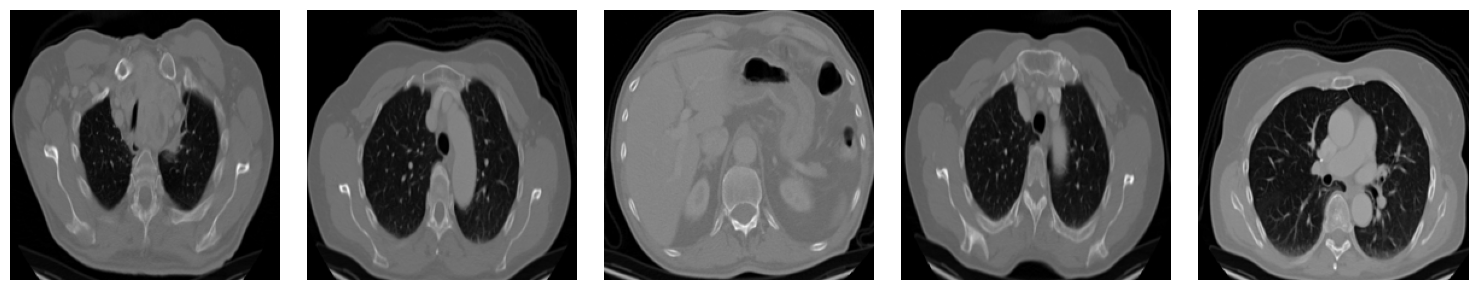

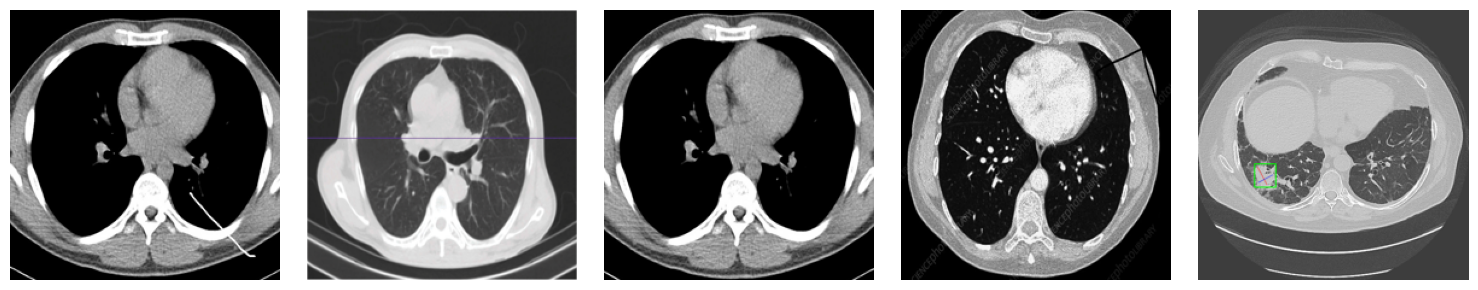

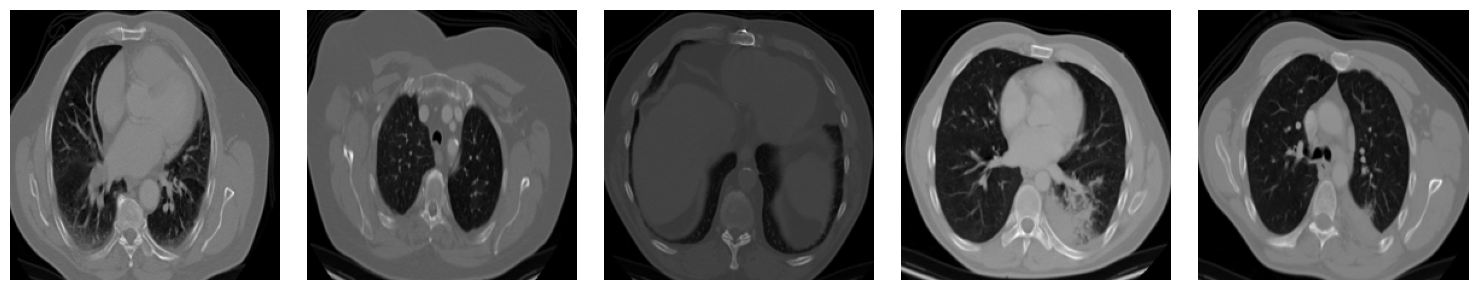

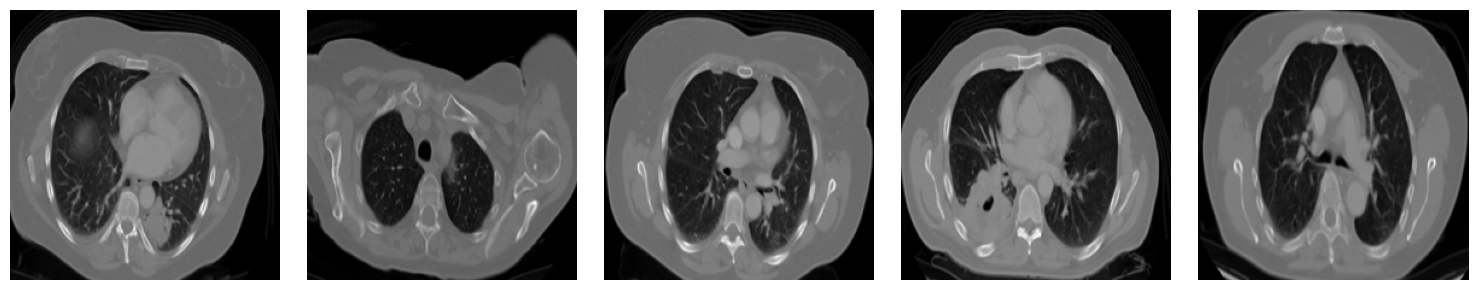

Class: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, Number of Images: 21
Class: normal, Number of Images: 13
Class: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, Number of Images: 15
Class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, Number of Images: 23


In [ ]:
# Paths to the image folders
valid_folders = [
    "/content/drive/MyDrive/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa",
    "/content/drive/MyDrive/Data/valid/normal",
    "/content/drive/MyDrive/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa",
        "/content/drive/MyDrive/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib"
]

# Image size
image_size = (224, 224)

# Create a dictionary to store the class names and their corresponding number of images
class_counts = {}

# Loop through the class folders
for train_folder in valid_folders:
    class_name = os.path.basename(train_folder)  # Get the class name from the folder path

    # Get the list of image filenames in the current folder
    image_filenames = os.listdir(train_folder)

    # Count the number of images in the class
    num_images = len(image_filenames)

    # Update the class_counts dictionary
    class_counts[class_name] = num_images

    # Choose the number of images to display from each folder
    num_images_to_display = 5
    random_images = random.sample(image_filenames, num_images_to_display)

    # Create a figure with a single row and the desired number of columns
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

    # Loop through the image filenames and display the images
    for i, image_filename in enumerate(random_images):
        image_path = os.path.join(train_folder, image_filename)
        image = Image.open(image_path)
        image = image.resize(image_size)

        # Display the image in the appropriate subplot
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

# Print the class names and their respective number of images
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of Images: {count}")


In [ ]:
# Target image size
target_size = (224, 224)

# Function to resize images in a folder
def resize_images_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        try:
            Image.open(image_path).resize(target_size).save(image_path)
        except Exception as e:
            print(f"Error resizing image {image_path}: {str(e)}")

# Loop through the specified folders and resize images
for folder in valid_folders:
    resize_images_in_folder(folder)
    print(f"Images in folder {folder} have been resized to {target_size}.")


Images in folder /content/drive/MyDrive/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa have been resized to (224, 224).
Images in folder /content/drive/MyDrive/Data/valid/normal have been resized to (224, 224).
Images in folder /content/drive/MyDrive/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa have been resized to (224, 224).
Images in folder /content/drive/MyDrive/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib have been resized to (224, 224).


#Augmentation

In [ ]:
import Augmentor

# Define the input and output directories for each class
class_directories = [

    ("/content/drive/MyDrive/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa", "/content/drive/MyDrive/Data/augmented_valid/large.cell.carcinoma"),
    ("/content/drive/MyDrive/Data/valid/normal", "/content/drive/MyDrive/Data/augmented_valid/normal"),
    ("/content/drive/MyDrive/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa", "/content/drive/MyDrive/Data/augmented_valid/squamous.cell.carcinoma"),
    ("/content/drive/MyDrive/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib", "/content/drive/MyDrive/Data/augmented_valid/adenocarcinoma")
]

def apply_augmentation(pipeline):
    pipeline.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
    pipeline.zoom_random(probability=0.5, percentage_area=0.8)
    pipeline.flip_left_right(probability=0.5)

    # Apply cropping with constraints
    pipeline.crop_random(probability=0.5, percentage_area=0.8)

    pipeline.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)
    pipeline.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)
    pipeline.random_color(probability=0.5, min_factor=0.7, max_factor=1.3)

# Iterate through the class directories and create pipelines
for input_dir, output_dir in class_directories:
    p = Augmentor.Pipeline(source_directory=input_dir, output_directory=output_dir)
    apply_augmentation(p)
    p.sample(500)


Initialised with 21 image(s) found.
Output directory set to /content/drive/MyDrive/Data/augmented_valid/large.cell.carcinoma.

Processing <PIL.Image.Image image mode=RGBA size=179x179 at 0x79989A93BFA0>: 100%|██████████| 500/500 [00:13<00:00, 36.20 Samples/s]


Initialised with 13 image(s) found.
Output directory set to /content/drive/MyDrive/Data/augmented_valid/normal.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x79989A6F7160>: 100%|██████████| 500/500 [00:13<00:00, 37.82 Samples/s]


Initialised with 15 image(s) found.
Output directory set to /content/drive/MyDrive/Data/augmented_valid/squamous.cell.carcinoma.

Processing <PIL.Image.Image image mode=RGBA size=179x179 at 0x79989A6EBB20>: 100%|██████████| 500/500 [00:13<00:00, 37.46 Samples/s]


Initialised with 23 image(s) found.
Output directory set to /content/drive/MyDrive/Data/augmented_valid/adenocarcinoma.

Processing <PIL.Image.Image image mode=RGBA size=179x179 at 0x79989A74E500>: 100%|██████████| 500/500 [00:12<00:00, 38.48 Samples/s]


In [ ]:
# List of folders to count images in
augmented_valid = [
    "/content/drive/MyDrive/Data/augmented_valid/large.cell.carcinoma",
    "/content/drive/MyDrive/Data/augmented_valid/normal",
    "/content/drive/MyDrive/Data/augmented_valid/squamous.cell.carcinoma",
    "/content/drive/MyDrive/Data/augmented_valid/adenocarcinoma"
]

# Function to count images in a folder
def count_images_in_folder(folder_path):
    try:
        image_count = len([filename for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.jpeg', '.png', '.gif'))])
        return image_count
    except Exception as e:
        print(f"Error counting images in folder {folder_path}: {str(e)}")
        return 0

# Loop through the specified folders and count images
for folder in augmented_valid:
    image_count = count_images_in_folder(folder)
    print(f"Total number of images in folder {folder}: {image_count}")


Total number of images in folder /content/drive/MyDrive/Data/augmented_valid/large.cell.carcinoma: 500
Total number of images in folder /content/drive/MyDrive/Data/augmented_valid/normal: 500
Total number of images in folder /content/drive/MyDrive/Data/augmented_valid/squamous.cell.carcinoma: 500
Total number of images in folder /content/drive/MyDrive/Data/augmented_valid/adenocarcinoma: 500


#Normalization

#X and Y split

In [ ]:
# Initialize x_valid and y_valid to store image data and labels
x_valid = []  # Features (images)
y_valid = []  # Labels

# Loop through the class folders
for class_index, class_folder in enumerate(augmented_valid):
    class_name = os.path.basename(class_folder)  # Get the class name from the folder name

    # Loop through the images in the class folder
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)
        try:
            # Load and preprocess the image (e.g., resize, normalize)
            img = cv2.imread(image_path)
            img = cv2.resize(img, (96, 96))  # Resize to your desired dimensions
            img = img / 255.0  # Normalize pixel values to [0, 1] range
            x_valid.append(img)
            y_valid.append(class_index)  # Use class index as the label
        except Exception as e:
            print(f"Error processing image {image_path}: {str(e)}")

# Convert lists to NumPy arrays for x_valid and y_valid
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

In [ ]:
# Print the shape of the training and validation sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_val:", x_valid.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_valid.shape)

Shape of x_train: (8000, 96, 96, 3)
Shape of x_val: (2000, 96, 96, 3)
Shape of y_train: (8000,)
Shape of y_val: (2000,)


#One Hot Encoding

In [ ]:
from keras.utils import to_categorical

# Convert target values to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=4)
y_valid_encoded = to_categorical(y_valid, num_classes=4)

In [ ]:
# Print the shape of the training and validation sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_valid:", x_valid.shape)
print("Shape of y_train:", y_train_encoded.shape)
print("Shape of y_valid:", y_valid_encoded.shape)

Shape of x_train: (8000, 96, 96, 3)
Shape of x_valid: (2000, 96, 96, 3)
Shape of y_train: (8000, 4)
Shape of y_valid: (2000, 4)


#Convolutional Neural Network

In [ ]:
# Importing the libraries
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Conv2D

In [ ]:
# Create a Sequential model
cnn = keras.models.Sequential()

# Adding layers
cnn.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(96, 96, 3)))
cnn.add(BatchNormalization())
cnn.add(keras.layers.Activation('relu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(keras.layers.Activation('relu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(keras.layers.Activation('relu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(256))
cnn.add(BatchNormalization())
cnn.add(keras.layers.Activation('relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(128))
cnn.add(BatchNormalization())
cnn.add(keras.layers.Activation('relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(4, activation='softmax'))



In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 96, 96, 16)        64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 96, 96, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        1

In [ ]:
from keras.optimizers import Adam

# Learning rate and other parameters
lr = 0.001  # Adjust the learning rate as needed
epochs = 250
batch_size = 64

# Create the Adam optimizer with the specified learning rate
opt = Adam(learning_rate=lr)

# Compile your model
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_cnn = cnn.fit(x_train, y_train_encoded, batch_size = batch_size, epochs = epochs, validation_data = (x_valid,y_valid_encoded))

Epoch 1/250
125/125 [==============================] - 20s 31ms/step - loss: 1.1268 - accuracy: 0.5061 - val_loss: 1.9980 - val_accuracy: 0.2515
Epoch 2/250
125/125 [==============================] - 2s 19ms/step - loss: 0.9043 - accuracy: 0.5950 - val_loss: 1.6388 - val_accuracy: 0.2760
Epoch 3/250
125/125 [==============================] - 2s 19ms/step - loss: 0.8114 - accuracy: 0.6385 - val_loss: 1.3371 - val_accuracy: 0.3730
Epoch 4/250
125/125 [==============================] - 3s 21ms/step - loss: 0.7271 - accuracy: 0.6819 - val_loss: 1.0186 - val_accuracy: 0.5280
Epoch 5/250
125/125 [==============================] - 3s 21ms/step - loss: 0.6646 - accuracy: 0.7095 - val_loss: 0.9252 - val_accuracy: 0.5545
Epoch 6/250
125/125 [==============================] - 2s 20ms/step - loss: 0.5986 - accuracy: 0.7416 - val_loss: 0.9832 - val_accuracy: 0.5560
Epoch 7/250
125/125 [==============================] - 3s 20ms/step - loss: 0.5406 - accuracy: 0.7768 - val_loss: 0.8613 - val_accuracy

In [ ]:
data = pd.DataFrame(history_cnn.history)
data.loc[data['accuracy'].idxmax()]

loss            0.005577
accuracy        0.998375
val_loss        2.721971
val_accuracy    0.650000
Name: 234, dtype: float64

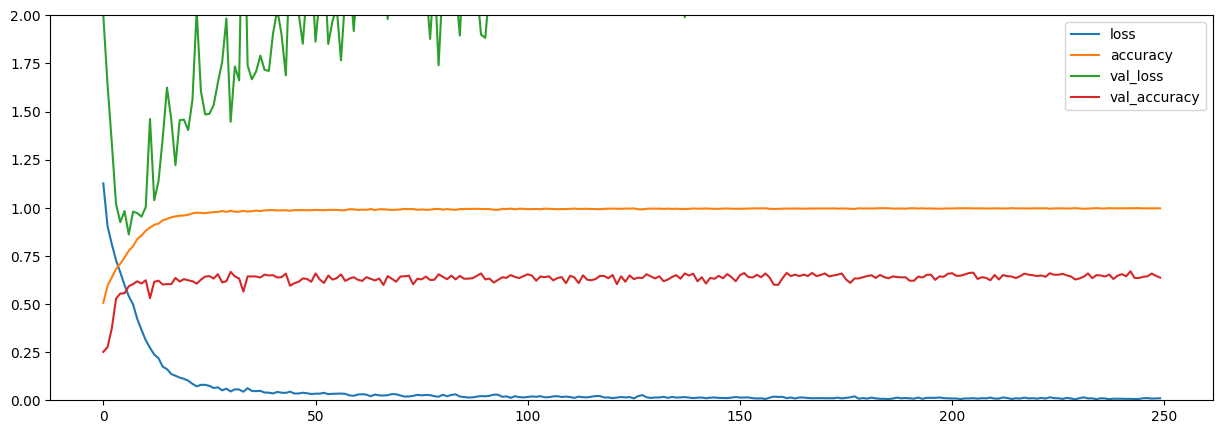

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history_cnn.history).plot(figsize=(15, 5))
plt.grid(False)
plt.gca().set_ylim(0, 2)
plt.show()

1/1 [==============================] - 0s 265ms/step
Image Path: /content/drive/MyDrive/Data/test/large.cell.carcinoma/000108.png
Original Class: large.cell.carcinoma
Predicted Class: adenocarcinoma
Class Probabilities: [2.5200127e-02 5.2930940e-02 3.5333851e-08 9.2186892e-01]



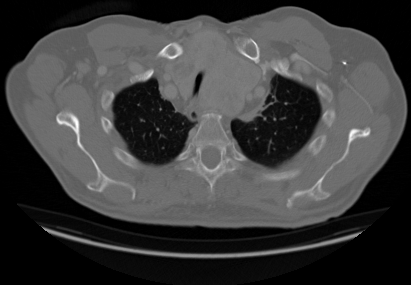

1/1 [==============================] - 0s 19ms/step
Image Path: /content/drive/MyDrive/Data/test/normal/6 - Copy (2) - Copy.png
Original Class: normal
Predicted Class: normal
Class Probabilities: [6.5613082e-25 1.0000000e+00 4.1309899e-17 3.0870834e-17]



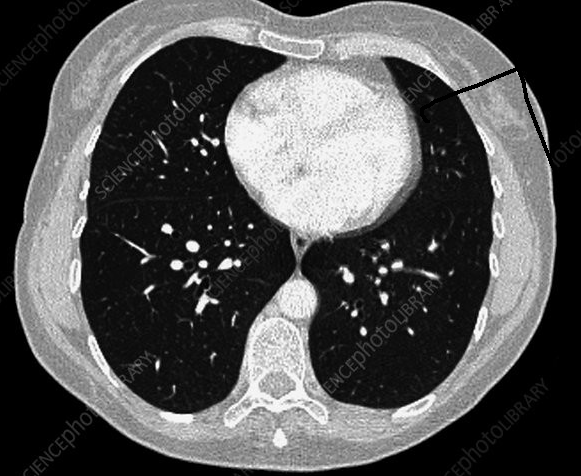

1/1 [==============================] - 0s 31ms/step
Image Path: /content/drive/MyDrive/Data/test/squamous.cell.carcinoma/000108 (6).png
Original Class: squamous.cell.carcinoma
Predicted Class: adenocarcinoma
Class Probabilities: [4.4169584e-01 4.2457683e-03 2.4423738e-05 5.5403394e-01]



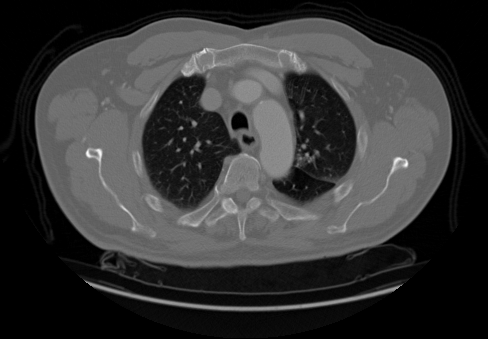

1/1 [==============================] - 0s 22ms/step
Image Path: /content/drive/MyDrive/Data/test/adenocarcinoma/000108 (3).png
Original Class: adenocarcinoma
Predicted Class: adenocarcinoma
Class Probabilities: [4.5909361e-17 3.2656537e-06 1.6440920e-06 9.9999511e-01]



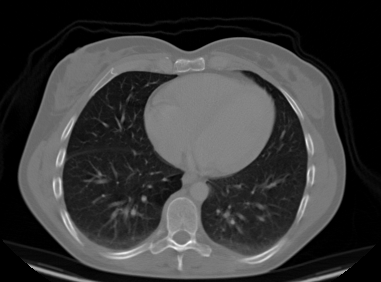

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load your trained Xception model here
# model = ... (load your Xception model)

# List of image paths and their corresponding class names
image_paths = [
    "/content/drive/MyDrive/Data/test/large.cell.carcinoma/000108.png",
    "/content/drive/MyDrive/Data/test/normal/6 - Copy (2) - Copy.png",
    "/content/drive/MyDrive/Data/test/squamous.cell.carcinoma/000108 (6).png",
    "/content/drive/MyDrive/Data/test/adenocarcinoma/000108 (3).png"
]

class_names = [
    "large.cell.carcinoma",
    "normal",
    "squamous.cell.carcinoma",
    "adenocarcinoma"
]

# Create a dictionary to map class indices to class names
class_name_mapping = {i: class_name for i, class_name in enumerate(class_names)}

# Loop through each image path and make predictions
for image_path, original_class in zip(image_paths, class_names):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(96, 96))  # Adjust the target size as needed
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image (if you used normalization during training)

    # Make predictions
    predictions = cnn.predict(img)

    # Assuming you have class labels, you can get the predicted class
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = class_name_mapping[predicted_class_index[0]]

    # Print the results
    print("Image Path:", image_path)
    print("Original Class:", original_class)
    print("Predicted Class:", predicted_class)
    print("Class Probabilities:", predictions[0])
    print()

    # Display the image with class names
    from IPython.display import Image, display
    display(Image(filename=image_path))


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# List of true class labels
true_labels = [
    "large.cell.carcinoma",
    "normal",
    "squamous.cell.carcinoma",
    "adenocarcinoma"
]

# Lists to store true and predicted labels
true_classes = []
predicted_classes = []

# Loop through each image path and make predictions
for image_path, original_class in zip(image_paths, true_labels):
    # Load and preprocess the image (as you did in your code)
    img = image.load_img(image_path, target_size=(96, 96))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Make predictions
    predictions = cnn.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = class_name_mapping[predicted_class_index[0]]

    # Append true and predicted labels
    true_classes.append(original_class)
    predicted_classes.append(predicted_class)

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=true_labels)

# Print the classification report
print(report)


1/1 [==============================] - 0s 49ms/step
                         precision    recall  f1-score   support

   large.cell.carcinoma       0.33      1.00      0.50         1
                 normal       0.00      0.00      0.00         1
squamous.cell.carcinoma       1.00      1.00      1.00         1
         adenocarcinoma       0.00      0.00      0.00         1

               accuracy                           0.50         4
              macro avg       0.33      0.50      0.38         4
           weighted avg       0.33      0.50      0.38         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Residual Network (RESNET50)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

In [ ]:
# Define the input shape based on your data
input_shape = (96, 96, 3)

# Define the number of classes (adjust as needed)
num_classes = 4

# Create the ResNet-50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the complete model
resnet = Model(inputs=base_model.input, outputs=output)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
resnet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model (adjust batch_size and epochs as needed)
history_resnet = resnet.fit(x_train, y_train_encoded, validation_data=(x_valid, y_valid_encoded), batch_size=64, epochs=250, verbose=1)

Epoch 1/250
125/125 [==============================] - 13s 71ms/step - loss: 1.1694 - accuracy: 0.4595 - val_loss: 1.1729 - val_accuracy: 0.4465
Epoch 2/250
125/125 [==============================] - 7s 55ms/step - loss: 1.0405 - accuracy: 0.5004 - val_loss: 1.0859 - val_accuracy: 0.4580
Epoch 3/250
125/125 [==============================] - 8s 66ms/step - loss: 0.9831 - accuracy: 0.5285 - val_loss: 1.0033 - val_accuracy: 0.4770
Epoch 4/250
125/125 [==============================] - 8s 64ms/step - loss: 0.9586 - accuracy: 0.5476 - val_loss: 1.0233 - val_accuracy: 0.4985
Epoch 5/250
125/125 [==============================] - 7s 53ms/step - loss: 0.9474 - accuracy: 0.5516 - val_loss: 1.0103 - val_accuracy: 0.5125
Epoch 6/250
125/125 [==============================] - 8s 64ms/step - loss: 0.9303 - accuracy: 0.5606 - val_loss: 1.0429 - val_accuracy: 0.4845
Epoch 7/250
125/125 [==============================] - 7s 53ms/step - loss: 0.9361 - accuracy: 0.5559 - val_loss: 1.0913 - val_accuracy

In [ ]:
data2 = pd.DataFrame(history_resnet.history)
data2.loc[data2['accuracy'].idxmax()]

loss            0.362284
accuracy        0.847875
val_loss        1.542049
val_accuracy    0.544500
Name: 242, dtype: float64

In [ ]:
# Evaluate the model
loss, accuracy = resnet.evaluate(x_train, y_train_encoded)
print("Loss: {:.4f}".format(loss))
print("Accuracy: {:.2f}%".format(accuracy * 100))

250/250 [==============================] - 7s 26ms/step - loss: 0.3909 - accuracy: 0.8401
Loss: 0.3909
Accuracy: 84.01%


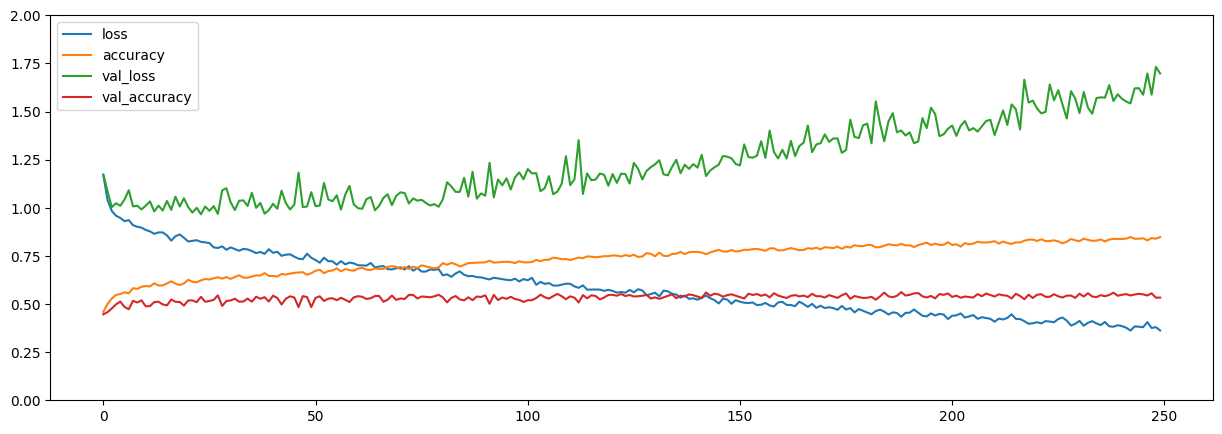

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history_resnet.history).plot(figsize=(15, 5))
plt.grid(False)
plt.gca().set_ylim(0, 2)
plt.show()

1/1 [==============================] - 1s 1s/step
Image Path: /content/drive/MyDrive/Data/test/large.cell.carcinoma/000108.png
Original Class: large.cell.carcinoma
Predicted Class: large.cell.carcinoma
Class Probabilities: [9.9999785e-01 2.8953336e-08 1.6694618e-06 4.2277560e-07]



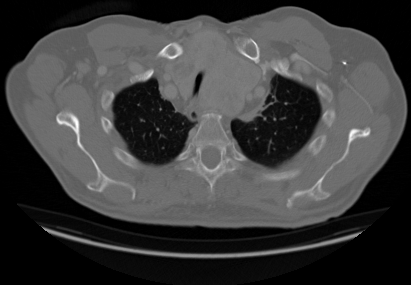

1/1 [==============================] - 0s 33ms/step
Image Path: /content/drive/MyDrive/Data/test/normal/6 - Copy (2) - Copy.png
Original Class: normal
Predicted Class: normal
Class Probabilities: [4.9433440e-29 1.0000000e+00 3.3417181e-24 1.6445149e-35]



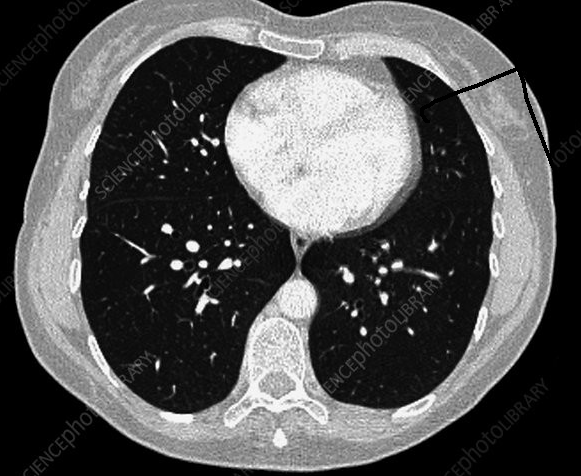

1/1 [==============================] - 0s 35ms/step
Image Path: /content/drive/MyDrive/Data/test/squamous.cell.carcinoma/000108 (6).png
Original Class: squamous.cell.carcinoma
Predicted Class: large.cell.carcinoma
Class Probabilities: [9.9552613e-01 2.8109536e-04 3.6968355e-04 3.8229749e-03]



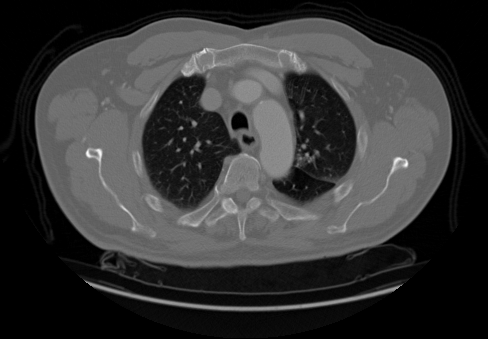

1/1 [==============================] - 0s 24ms/step
Image Path: /content/drive/MyDrive/Data/test/adenocarcinoma/000108 (3).png
Original Class: adenocarcinoma
Predicted Class: normal
Class Probabilities: [0.43187758 0.5216771  0.01611925 0.03032613]



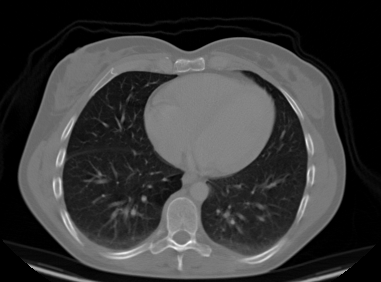

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load your trained Xception model here
# model = ... (load your Xception model)

# List of image paths and their corresponding class names
image_paths = [
    "/content/drive/MyDrive/Data/test/large.cell.carcinoma/000108.png",
    "/content/drive/MyDrive/Data/test/normal/6 - Copy (2) - Copy.png",
    "/content/drive/MyDrive/Data/test/squamous.cell.carcinoma/000108 (6).png",
    "/content/drive/MyDrive/Data/test/adenocarcinoma/000108 (3).png"
]

class_names = [
    "large.cell.carcinoma",
    "normal",
    "squamous.cell.carcinoma",
    "adenocarcinoma"
]

# Create a dictionary to map class indices to class names
class_name_mapping = {i: class_name for i, class_name in enumerate(class_names)}

# Loop through each image path and make predictions
for image_path, original_class in zip(image_paths, class_names):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(96, 96))  # Adjust the target size as needed
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image (if you used normalization during training)

    # Make predictions
    predictions = resnet.predict(img)

    # Assuming you have class labels, you can get the predicted class
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = class_name_mapping[predicted_class_index[0]]

    # Print the results
    print("Image Path:", image_path)
    print("Original Class:", original_class)
    print("Predicted Class:", predicted_class)
    print("Class Probabilities:", predictions[0])
    print()

    # Display the image with class names
    from IPython.display import Image, display
    display(Image(filename=image_path))


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# List of true class labels
true_labels = [
    "large.cell.carcinoma",
    "normal",
    "squamous.cell.carcinoma",
    "adenocarcinoma"
]

# Lists to store true and predicted labels
true_classes = []
predicted_classes = []

# Loop through each image path and make predictions
for image_path, original_class in zip(image_paths, true_labels):
    # Load and preprocess the image (as you did in your code)
    img = image.load_img(image_path, target_size=(96, 96))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Make predictions
    predictions = resnet.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = class_name_mapping[predicted_class_index[0]]

    # Append true and predicted labels
    true_classes.append(original_class)
    predicted_classes.append(predicted_class)

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=true_labels)

# Print the classification report
print(report)


1/1 [==============================] - 0s 37ms/step
                         precision    recall  f1-score   support

   large.cell.carcinoma       0.00      0.00      0.00         1
                 normal       0.50      1.00      0.67         1
squamous.cell.carcinoma       0.50      1.00      0.67         1
         adenocarcinoma       0.00      0.00      0.00         1

               accuracy                           0.50         4
              macro avg       0.25      0.50      0.33         4
           weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Xception

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create a base Xception model with pre-trained weights (excluding top classification layers)
base_model = Xception(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Replace 'num_classes' with the number of classes in your dataset

# Create the final model
xception = Model(inputs=base_model.input, outputs=predictions)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
# Compile the model
xception.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary
xception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 47, 47, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 47, 47, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 47, 47, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
# Train the model (adjust batch_size and epochs as needed)
history_xception = xception.fit(x_train, y_train_encoded, validation_data=(x_valid, y_valid_encoded), batch_size=64, epochs=250, verbose=1)

Epoch 1/250
125/125 [==============================] - 16s 85ms/step - loss: 0.9741 - accuracy: 0.5741 - val_loss: 1.0192 - val_accuracy: 0.5490
Epoch 2/250
125/125 [==============================] - 8s 67ms/step - loss: 0.6972 - accuracy: 0.7078 - val_loss: 0.9918 - val_accuracy: 0.5820
Epoch 3/250
125/125 [==============================] - 9s 74ms/step - loss: 0.5857 - accuracy: 0.7581 - val_loss: 1.0040 - val_accuracy: 0.5780
Epoch 4/250
125/125 [==============================] - 8s 64ms/step - loss: 0.4928 - accuracy: 0.8079 - val_loss: 1.1288 - val_accuracy: 0.5800
Epoch 5/250
125/125 [==============================] - 9s 73ms/step - loss: 0.4181 - accuracy: 0.8386 - val_loss: 1.0365 - val_accuracy: 0.5980
Epoch 6/250
125/125 [==============================] - 8s 65ms/step - loss: 0.3291 - accuracy: 0.8776 - val_loss: 1.1024 - val_accuracy: 0.6075
Epoch 7/250
125/125 [==============================] - 8s 64ms/step - loss: 0.2656 - accuracy: 0.9107 - val_loss: 1.2737 - val_accuracy

In [ ]:
data3 = pd.DataFrame(history_xception.history)
data3.loc[data3['accuracy'].idxmax()]

loss            0.009115
accuracy        1.000000
val_loss        1.784555
val_accuracy    0.632000
Name: 19, dtype: float64

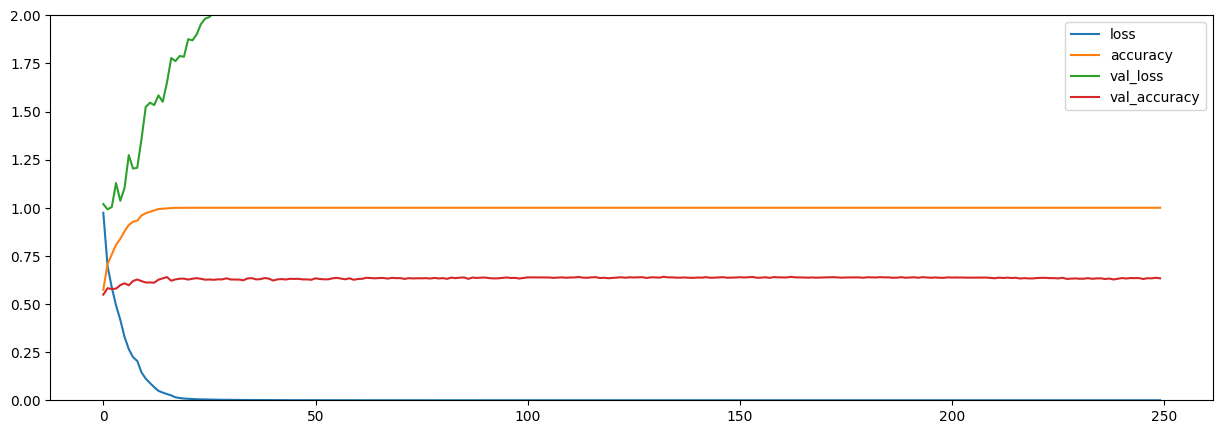

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history_xception.history).plot(figsize=(15, 5))
plt.grid(False)
plt.gca().set_ylim(0, 2)
plt.show()

1/1 [==============================] - 3s 3s/step
Image Path: /content/drive/MyDrive/Data/test/large.cell.carcinoma/000108.png
Original Class: large.cell.carcinoma
Predicted Class: large.cell.carcinoma
Class Probabilities: [1.0000000e+00 9.5079413e-25 5.0577571e-13 1.1153452e-10]



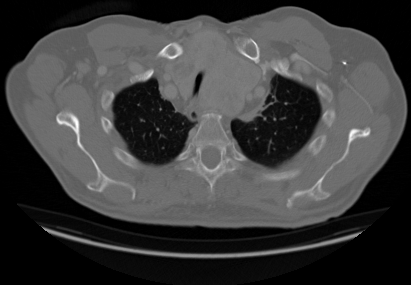

1/1 [==============================] - 0s 50ms/step
Image Path: /content/drive/MyDrive/Data/test/normal/6 - Copy (2) - Copy.png
Original Class: normal
Predicted Class: normal
Class Probabilities: [1.7501777e-26 1.0000000e+00 1.3952884e-19 1.7181319e-21]



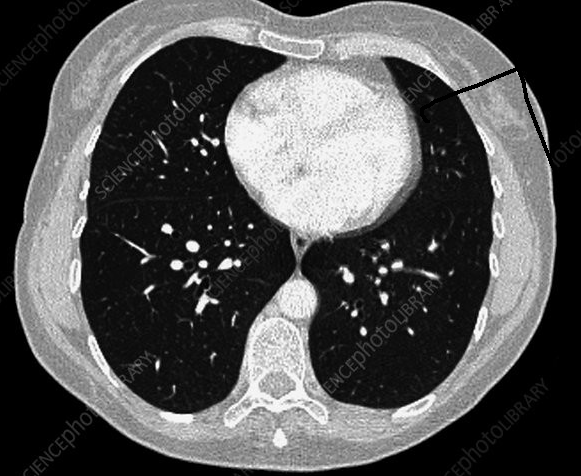

1/1 [==============================] - 0s 79ms/step
Image Path: /content/drive/MyDrive/Data/test/squamous.cell.carcinoma/000108 (6).png
Original Class: squamous.cell.carcinoma
Predicted Class: squamous.cell.carcinoma
Class Probabilities: [1.8059423e-10 1.9788185e-06 9.9075073e-01 9.2472825e-03]



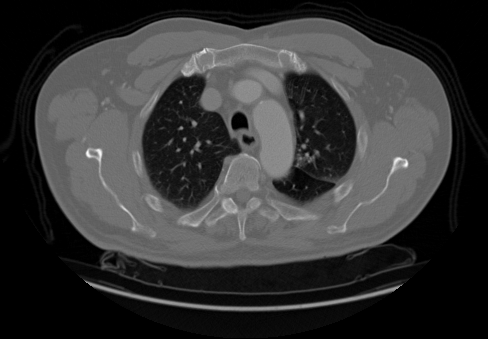

1/1 [==============================] - 0s 110ms/step
Image Path: /content/drive/MyDrive/Data/test/adenocarcinoma/000108 (3).png
Original Class: adenocarcinoma
Predicted Class: adenocarcinoma
Class Probabilities: [9.2673718e-09 1.6838040e-09 7.9252993e-07 9.9999917e-01]



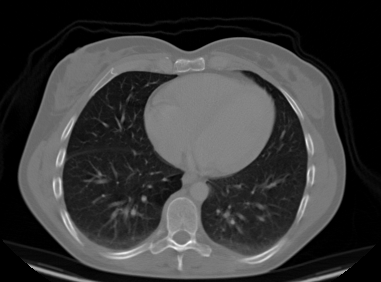

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load your trained Xception model here
# model = ... (load your Xception model)

# List of image paths and their corresponding class names
image_paths = [
    "/content/drive/MyDrive/Data/test/large.cell.carcinoma/000108.png",
    "/content/drive/MyDrive/Data/test/normal/6 - Copy (2) - Copy.png",
    "/content/drive/MyDrive/Data/test/squamous.cell.carcinoma/000108 (6).png",
    "/content/drive/MyDrive/Data/test/adenocarcinoma/000108 (3).png"
]

class_names = [
    "large.cell.carcinoma",
    "normal",
    "squamous.cell.carcinoma",
    "adenocarcinoma"
]

# Create a dictionary to map class indices to class names
class_name_mapping = {i: class_name for i, class_name in enumerate(class_names)}

# Loop through each image path and make predictions
for image_path, original_class in zip(image_paths, class_names):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(96, 96))  # Adjust the target size as needed
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image (if you used normalization during training)

    # Make predictions
    predictions = xception.predict(img)

    # Assuming you have class labels, you can get the predicted class
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = class_name_mapping[predicted_class_index[0]]

    # Print the results
    print("Image Path:", image_path)
    print("Original Class:", original_class)
    print("Predicted Class:", predicted_class)
    print("Class Probabilities:", predictions[0])
    print()

    # Display the image with class names
    from IPython.display import Image, display
    display(Image(filename=image_path))


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# List of true class labels
true_labels = [
    "large.cell.carcinoma",
    "normal",
    "squamous.cell.carcinoma",
    "adenocarcinoma"
]

# Lists to store true and predicted labels
true_classes = []
predicted_classes = []

# Loop through each image path and make predictions
for image_path, original_class in zip(image_paths, true_labels):
    # Load and preprocess the image (as you did in your code)
    img = image.load_img(image_path, target_size=(96, 96))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Make predictions
    predictions = xception.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = class_name_mapping[predicted_class_index[0]]

    # Append true and predicted labels
    true_classes.append(original_class)
    predicted_classes.append(predicted_class)

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=true_labels)

# Print the classification report
print(report)


1/1 [==============================] - 0s 51ms/step
                         precision    recall  f1-score   support

   large.cell.carcinoma       1.00      1.00      1.00         1
                 normal       1.00      1.00      1.00         1
squamous.cell.carcinoma       1.00      1.00      1.00         1
         adenocarcinoma       1.00      1.00      1.00         1

               accuracy                           1.00         4
              macro avg       1.00      1.00      1.00         4
           weighted avg       1.00      1.00      1.00         4



#Comparison of various performance metrics

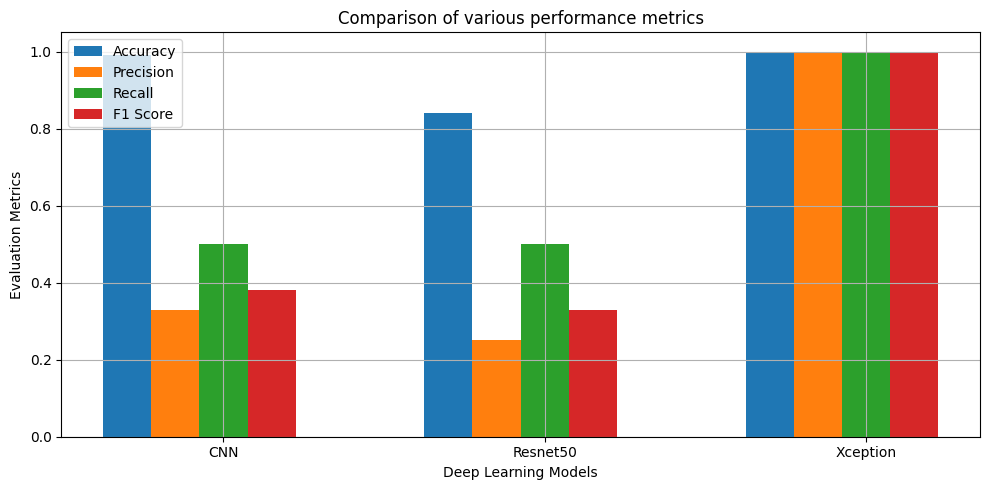

In [ ]:
# plot the evaluation metrics for each model
model_names = ['CNN', 'Resnet50', 'Xception']
accuracy  = [0.99,  0.84,  1.00]
precision = [0.33, 0.25, 1.00]
recall    = [0.50, 0.50, 1.00]
f1_score  = [0.38, 0.33, 1.00]

num_models = len(model_names)
bar_width = 0.15
bar_positions = np.arange(num_models)
fig, ax = plt.subplots()

# Create the bar plots for each evaluation metric
accuracy_bar = ax.bar(bar_positions, accuracy, bar_width, label='Accuracy')
precision_bar = ax.bar(bar_positions + bar_width, precision, bar_width, label='Precision')
recall_bar = ax.bar(bar_positions + 2 * bar_width, recall, bar_width, label='Recall')
f1_score_bar = ax.bar(bar_positions + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Set the labels and tick positions in the chart
ax.set_xlabel('Deep Learning Models')
ax.set_xticks(bar_positions + 2 * bar_width)
ax.set_xticklabels(model_names)
fig.set_size_inches(10, 5)
ax.set_ylabel('Evaluation Metrics')
ax.set_title('Comparison of various performance metrics')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()